In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
import os
import shutil
import seaborn as sns
from scipy import stats
from ptm_dict import modres
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# from sklearn.metrics import mean_absolute_error as mae

In [4]:
# Block of seaborn style settings
plt.rc('font', size=23) #controls default text size
plt.rc('axes', labelsize=20) #fontsize of the x and y labels
plt.rc('xtick', labelsize=18) #fontsize of the x tick labels
plt.rc('ytick', labelsize=18) #fontsize of the y tick labels
sns.set(style='whitegrid', color_codes=True, font='serif', font_scale=2)

plt.rc('font', size=23) #controls default text size
plt.rc('xtick', labelsize=25) #fontsize of the x tick labels
plt.rc('ytick', labelsize=25) #fontsize of the y tick labels

In [ ]:
skempi2 = pd.read_csv('/groups/sbinlab/panf/SKEMPIv2_benchmark/skempi2_final.csv')
skempi2_raw = pd.read_csv('/groups/sbinlab/panf/SKEMPIv2_benchmark/skempi_v2.csv', sep=';')
skempi2_avg_nb = pd.read_csv('/groups/sbinlab/panf/SKEMPIv2_benchmark/skempi2_nb.csv')

In [ ]:
exp_cart_ddG_all = pd.read_csv('/groups/sbinlab/panf/SKEMPIv2_benchmark/cart_pipeline_full_struct.csv')

In [ ]:
exp_cart_ddG_nb = pd.read_csv('/groups/sbinlab/panf/SKEMPIv2_benchmark/cart_pipeline_full_struct_nb_inc.csv')

In [ ]:
exp_flex_ddG = pd.read_csv('flex_ddg_reg_skempi2_new.csv')

In [ ]:
exp_cart_ddG_nb

In [7]:
exp_cart_ddG_all_nb = pd.concat([exp_cart_ddG_all, exp_cart_ddG_nb])

In [10]:
exp_cart_ddG_all_nb.loc[exp_cart_ddG_all_nb.duplicated(subset=['#Pdb', 'Mutation(s)_PDB'], keep=False)]

,variant,mean_ddG,std_ddG,mean_ddG_infc,std_ddG_infc,PDB_ID,index,case_ID,#Pdb,Mutation(s)_PDB,...,small-to-large,type_of_change_infc,type_of_change_aa,N_mut,dG_bind_WT_mean,dG_bind_MUT_mean,ddG_bind_mean,dG_bind_WT_std,dG_bind_MUT_std,ddG_bind_std
186,Y304A,4.159770,0.014280,0.940453,0.005423,1JCK,186,186_1JCK,1JCK_A_B,YB90A,...,False,infc to non-infc,same type,1,NaN,NaN,NaN,NaN,NaN,NaN
551,T756S,0.845517,0.000000,0.975309,0.010475,2AJF,551,551_2AJF,2AJF_A_E,TE487S,...,False,non-infc to non-infc,same type,1,NaN,NaN,NaN,NaN,NaN,NaN
1699,K525A,1.513448,0.022295,0.958092,0.024549,3HFM,1699,1699_3HFM,3HFM_HL_Y,KY96A,...,False,non-infc to non-infc,positive to hydrophobic,1,NaN,NaN,NaN,NaN,NaN,NaN
3033,Y379A,4.295402,0.002834,2.978370,0.008402,1BD2,3033,3033_1BD2,1BD2_ABC_DE,YC5A,...,False,infc to non-infc,same type,1,NaN,NaN,NaN,NaN,NaN,NaN
3076,R65A,1.565517,0.002395,0.642604,0.009089,1AO7,3076,3076_1AO7,1AO7_ABC_DE,RA65A,...,False,infc to non-infc,positive to hydrophobic,1,NaN,NaN,NaN,NaN,NaN,NaN
3092,Y382A,0.622874,0.005975,0.557986,3.150254,1AO7,3092,3092_1AO7,1AO7_ABC_DE,YC8A,...,False,infc to non-infc,same type,1,NaN,NaN,NaN,NaN,NaN,NaN
3173,K66A,-0.040920,0.089995,-0.569395,0.180660,1AO7,3173,3173_1AO7,1AO7_ABC_DE,KA66A,...,False,non-infc to non-infc,positive to hydrophobic,1,NaN,NaN,NaN,NaN,NaN,NaN
3780,M416V:A418T:G503E:A545V,9.676437,0.070773,1.667140,0.132203,4K71,3780,3780_4K71,4K71_A_BC,"AA420T,AA547V,GA505E,MA418V",...,False,mixed,mixed,3+,NaN,NaN,NaN,NaN,NaN,NaN
4012,M4L:T241D:N244H:H314Y:S318T,-2.452989,0.105355,-2.256503,0.010830,1BJ1,4012,4012_1BJ1,1BJ1_HL_VW,"HH101Y,ML4L,NH31H,SH105T,TH28D",...,False,mixed,mixed,3+,NaN,NaN,NaN,NaN,NaN,NaN
4013,L192M:D429T:H432N:Y502H:T506S,5.459885,0.171013,2.555709,0.341152,1CZ8,4013,4013_1CZ8,1CZ8_HL_VW,"DH28T,HH31N,LL4M,TH105S,YH101H",...,False,mixed,mixed,3+,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
S2536 = pd.read_csv('/groups/sbinlab/panf/SKEMPIv2_benchmark/S2536.csv', sep=';', na_values='XXX')

In [53]:
S2536

,Entry,PDB,Interacting Chains,Mutation(s),Mutation(s)_in_raw_pdb,Temperature,Reference,DDGb,DDGb_SK1,cRSA,...,SAAMBE-3D,SAAMBE-3D_rev,NetTree,NetTree_rev,FoldX,FoldX_rev,BindProfX,BindProfX_rev,consensus,consensus_rev
0,1,1CSE,E:I,LI38G,LI45G,294.0,9048543,2.249,2.249,8.359,...,2.812825,0.530206,1.676192,1.527064,3.0042,3.3443,2.6480,-0.1430,2.751777,0.162946
1,2,1CSE,E:I,LI38S,LI45S,294.0,9048543,1.172,1.172,8.359,...,1.543789,1.109185,2.706162,1.402388,3.2729,-2.5399,2.6710,-1.7170,2.494856,-0.688041
2,3,1CSE,E:I,LI38P,LI45P,294.0,9048543,6.672,6.672,8.359,...,5.933657,0.615902,3.116857,0.448269,3.1117,-1.8050,2.6960,-1.4480,3.973277,-1.205229
3,4,1CSE,E:I,LI38I,LI45I,294.0,9048543,2.941,2.941,8.359,...,2.560643,1.281160,1.463532,1.199537,2.5986,-0.9517,2.3510,-1.2850,2.098347,-0.502125
4,5,1CSE,E:I,LI38D,LI45D,294.0,9048543,4.351,4.351,8.359,...,4.143629,1.001774,3.296694,1.180625,2.6593,-1.9353,2.5390,-1.5260,3.235453,-0.653613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,6933,4L0P,A:B,EA27K,EA53K,298.0,22242939,2.665,NaN,8.045,...,1.417446,1.253170,2.783903,4.947306,4.0381,-3.6124,1.9970,-1.1220,2.121806,-0.102740
2532,6934,4L0P,A:B,NA59S,NA85S,298.0,22242939,0.314,NaN,21.901,...,-0.016992,0.040266,1.115719,0.024264,0.0000,-0.1302,0.0000,-0.0330,0.234091,-0.068834
2533,6935,4L0P,A:B,TA76Q,TA102Q,298.0,22242939,1.472,NaN,0.000,...,0.759861,0.816764,2.901882,1.486909,4.3408,-1.9547,2.1520,-0.5730,2.038568,-0.541753
2534,6936,4L0P,A:B,TA140N,TA166N,298.0,22242939,0.278,NaN,42.111,...,0.140375,0.036820,2.027168,-0.102010,0.0000,0.0058,0.0000,0.0010,0.373818,-0.113174


In [54]:
S2536_sub = pd.merge(S2536, exp_cart_ddG_all_nb[['variant', 'mean_ddG', 'std_ddG',
                                              'mean_ddG_infc', 'std_ddG_infc', 'PDB_ID',
                                              'case_ID', 'Mutation(s)_PDB', 'ddG_bind', 
                                              'small-to-large', 'type_of_change_infc',
                                              'type_of_change_aa', 'N_mut',
                                              'multiple_measurements', 'no_proper_value',
                                              'Method',
                                              'LChains',	'RChains',	'Chains']], left_on=['PDB', 'Mutation(s)_in_raw_pdb'], right_on=['PDB_ID', 'Mutation(s)_PDB'], how='left')

In [55]:
S2536_sub

,Entry,PDB,Interacting Chains,Mutation(s),Mutation(s)_in_raw_pdb,Temperature,Reference,DDGb,DDGb_SK1,cRSA,...,small-to-large,type_of_change_infc,type_of_change_aa,N_mut,multiple_measurements,no_proper_value,Method,LChains,RChains,Chains
0,1,1CSE,E:I,LI38G,LI45G,294.0,9048543,2.249,2.249,8.359,...,False,infc to non-infc,hydrophobic to special,1,False,Regular,IASP,E,I,EI
1,2,1CSE,E:I,LI38S,LI45S,294.0,9048543,1.172,1.172,8.359,...,False,infc to non-infc,hydrophobic to polar,1,False,Regular,IASP,E,I,EI
2,3,1CSE,E:I,LI38P,LI45P,294.0,9048543,6.672,6.672,8.359,...,False,infc to non-infc,hydrophobic to special,1,False,Regular,IASP,E,I,EI
3,4,1CSE,E:I,LI38I,LI45I,294.0,9048543,2.941,2.941,8.359,...,False,infc to infc,same type,1,False,Regular,IASP,E,I,EI
4,5,1CSE,E:I,LI38D,LI45D,294.0,9048543,4.351,4.351,8.359,...,False,infc to non-infc,hydrophobic to negative,1,False,Regular,IASP,E,I,EI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,6933,4L0P,A:B,EA27K,EA53K,298.0,22242939,2.665,NaN,8.045,...,True,non-infc to non-infc,negative to positive,1,False,Regular,ELISA,A,B,AB
2533,6934,4L0P,A:B,NA59S,NA85S,298.0,22242939,0.314,NaN,21.901,...,False,non-infc to non-infc,same type,1,False,Regular,ELISA,A,B,AB
2534,6935,4L0P,A:B,TA76Q,TA102Q,298.0,22242939,1.472,NaN,0.000,...,True,non-infc to non-infc,same type,1,False,Regular,ELISA,A,B,AB
2535,6936,4L0P,A:B,TA140N,TA166N,298.0,22242939,0.278,NaN,42.111,...,True,non-infc to non-infc,same type,1,False,Regular,ELISA,A,B,AB


In [56]:
S2536_sub_flex = pd.merge(S2536_sub, exp_flex_ddG[['PDB_ID','case_ID', 'Mutation(s)_PDB', 'total_score']],
                     on =['PDB_ID','Mutation(s)_PDB'], how='left')

In [23]:
S2536_sub_flex.loc[S2536_sub_flex['total_score'].isna()]

,Entry,PDB,Interacting Chains,Mutation(s),Mutation(s)_in_raw_pdb,Temperature,Reference,DDGb,DDGb_SK1,cRSA,...,type_of_change_aa,N_mut,multiple_measurements,no_proper_value,Method,LChains,RChains,Chains,case_ID_y,total_score
26,30,1Y3B,E:I,SI41E,SI60E,298.00,15865427,-2.747,-2.747,7.029,...,polar to negative,1,False,Regular,IASP,E,I,EI,29_1Y3B,NaN
28,33,1Y48,E:I,AI46R,AI65R,298.00,15865427,-3.754,-3.754,6.889,...,hydrophobic to positive,1,False,Regular,IASP,E,I,EI,32_1Y48,NaN
33,43,1TM4,E:I,GI40M,GI59M,298.00,15504027,-2.232,-2.232,9.414,...,special to hydrophobic,1,False,Regular,IASP,E,I,EI,38_1TM4,NaN
34,44,1TM5,E:I,AI40M,AI59M,298.00,15504027,-1.027,-1.027,7.043,...,same type,1,False,Regular,IASP,E,I,EI,39_1TM5,NaN
35,45,1TM3,E:I,KI40M,KI59M,298.00,15504027,-1.093,-1.093,8.284,...,positive to hydrophobic,1,False,Regular,IASP,E,I,EI,40_1TM3,NaN
38,48,1TO1,E:I,AI42Y,AI61Y,298.00,15504027,-2.980,-2.98,14.288,...,same type,1,False,Regular,IASP,E,I,EI,43_1TO1,NaN
99,"114,188",1BRS,A:D,DD39A,DD39A,298.00,"7739054,Water-mediated_interaction_at_a_protei...",6.790,6.79,0.968,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,411,2WPT,A:B,DA30L,DA33L,298.00,9718299,-3.402,-3.402,1.225,...,negative to hydrophobic,1,False,Regular,SFFL,A,B,AB,360_2WPT,NaN
262,"439,451",2WPT,A:B,SB67A,SB74A,298.00,18471830,-0.134,-0.134,4.186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,512,1EMV,A:B,TA36A,TA38A,298.00,9425068,0.900,0.9,28.626,...,polar to hydrophobic,1,False,Regular,SFFL,A,B,AB,448_1EMV,NaN


In [58]:
method_list = ['mCSM-PPI2', 'MutaBind2','BeAtMuSiC','SSIPe','SAAMBE-3D', 'NetTree', 'FoldX', 'BindProfX', 'mean_ddG_infc', 'total_score']

In [59]:
for m in method_list:
    print(m)
    display(S2536_sub_flex.loc[S2536_sub_flex[m]=='XXX'])

mCSM-PPI2


,Entry,PDB,Interacting Chains,Mutation(s),Mutation(s)_in_raw_pdb,Temperature,Reference,DDGb,DDGb_SK1,cRSA,...,type_of_change_aa,N_mut,multiple_measurements,no_proper_value,Method,LChains,RChains,Chains,case_ID_y,total_score


MutaBind2


,Entry,PDB,Interacting Chains,Mutation(s),Mutation(s)_in_raw_pdb,Temperature,Reference,DDGb,DDGb_SK1,cRSA,...,type_of_change_aa,N_mut,multiple_measurements,no_proper_value,Method,LChains,RChains,Chains,case_ID_y,total_score


BeAtMuSiC


,Entry,PDB,Interacting Chains,Mutation(s),Mutation(s)_in_raw_pdb,Temperature,Reference,DDGb,DDGb_SK1,cRSA,...,type_of_change_aa,N_mut,multiple_measurements,no_proper_value,Method,LChains,RChains,Chains,case_ID_y,total_score


SSIPe


,Entry,PDB,Interacting Chains,Mutation(s),Mutation(s)_in_raw_pdb,Temperature,Reference,DDGb,DDGb_SK1,cRSA,...,type_of_change_aa,N_mut,multiple_measurements,no_proper_value,Method,LChains,RChains,Chains,case_ID_y,total_score


SAAMBE-3D


,Entry,PDB,Interacting Chains,Mutation(s),Mutation(s)_in_raw_pdb,Temperature,Reference,DDGb,DDGb_SK1,cRSA,...,type_of_change_aa,N_mut,multiple_measurements,no_proper_value,Method,LChains,RChains,Chains,case_ID_y,total_score


NetTree


,Entry,PDB,Interacting Chains,Mutation(s),Mutation(s)_in_raw_pdb,Temperature,Reference,DDGb,DDGb_SK1,cRSA,...,type_of_change_aa,N_mut,multiple_measurements,no_proper_value,Method,LChains,RChains,Chains,case_ID_y,total_score


FoldX


,Entry,PDB,Interacting Chains,Mutation(s),Mutation(s)_in_raw_pdb,Temperature,Reference,DDGb,DDGb_SK1,cRSA,...,type_of_change_aa,N_mut,multiple_measurements,no_proper_value,Method,LChains,RChains,Chains,case_ID_y,total_score


BindProfX


,Entry,PDB,Interacting Chains,Mutation(s),Mutation(s)_in_raw_pdb,Temperature,Reference,DDGb,DDGb_SK1,cRSA,...,type_of_change_aa,N_mut,multiple_measurements,no_proper_value,Method,LChains,RChains,Chains,case_ID_y,total_score


mean_ddG_infc


,Entry,PDB,Interacting Chains,Mutation(s),Mutation(s)_in_raw_pdb,Temperature,Reference,DDGb,DDGb_SK1,cRSA,...,type_of_change_aa,N_mut,multiple_measurements,no_proper_value,Method,LChains,RChains,Chains,case_ID_y,total_score


total_score


,Entry,PDB,Interacting Chains,Mutation(s),Mutation(s)_in_raw_pdb,Temperature,Reference,DDGb,DDGb_SK1,cRSA,...,type_of_change_aa,N_mut,multiple_measurements,no_proper_value,Method,LChains,RChains,Chains,case_ID_y,total_score


In [60]:
S2536_sub_flex.dropna(subset=method_list)

,Entry,PDB,Interacting Chains,Mutation(s),Mutation(s)_in_raw_pdb,Temperature,Reference,DDGb,DDGb_SK1,cRSA,...,type_of_change_aa,N_mut,multiple_measurements,no_proper_value,Method,LChains,RChains,Chains,case_ID_y,total_score
0,1,1CSE,E:I,LI38G,LI45G,294.0,9048543,2.249,2.249,8.359,...,hydrophobic to special,1,False,Regular,IASP,E,I,EI,0_1CSE,3.31973
1,2,1CSE,E:I,LI38S,LI45S,294.0,9048543,1.172,1.172,8.359,...,hydrophobic to polar,1,False,Regular,IASP,E,I,EI,1_1CSE,2.32569
2,3,1CSE,E:I,LI38P,LI45P,294.0,9048543,6.672,6.672,8.359,...,hydrophobic to special,1,False,Regular,IASP,E,I,EI,2_1CSE,3.13394
3,4,1CSE,E:I,LI38I,LI45I,294.0,9048543,2.941,2.941,8.359,...,same type,1,False,Regular,IASP,E,I,EI,3_1CSE,0.01419
4,5,1CSE,E:I,LI38D,LI45D,294.0,9048543,4.351,4.351,8.359,...,hydrophobic to negative,1,False,Regular,IASP,E,I,EI,4_1CSE,2.17061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,6933,4L0P,A:B,EA27K,EA53K,298.0,22242939,2.665,NaN,8.045,...,negative to positive,1,False,Regular,ELISA,A,B,AB,6031_4L0P,2.83743
2533,6934,4L0P,A:B,NA59S,NA85S,298.0,22242939,0.314,NaN,21.901,...,same type,1,False,Regular,ELISA,A,B,AB,6032_4L0P,0.13902
2534,6935,4L0P,A:B,TA76Q,TA102Q,298.0,22242939,1.472,NaN,0.000,...,same type,1,False,Regular,ELISA,A,B,AB,6033_4L0P,0.66805
2535,6936,4L0P,A:B,TA140N,TA166N,298.0,22242939,0.278,NaN,42.111,...,same type,1,False,Regular,ELISA,A,B,AB,6034_4L0P,-0.47818


In [61]:
S2536_sub_flex_no_nan = S2536_sub_flex.dropna(subset=method_list)

for m in method_list:

    print(m)
    
    rp, pp = stats.pearsonr(S2536_sub_flex_no_nan['DDGb'], S2536_sub_flex_no_nan[m])
    print("Pearson's r: ", rp)
    
    rs, ps = stats.spearmanr(S2536_sub_flex_no_nan['DDGb'], S2536_sub_flex_no_nan[m])
    print("Spearman's r: ", rs)
    
    rmse = sqrt(mean_squared_error(S2536_sub_flex_no_nan['DDGb'], S2536_sub_flex_no_nan[m]))
    print("RMSE: ", rmse)

mCSM-PPI2
Pearson's r:  0.9017332713868922
Spearman's r:  0.8995568484195199
RMSE:  0.9124757091508832
MutaBind2
Pearson's r:  0.8834803757421507
Spearman's r:  0.8427335941261557
RMSE:  0.9099244572690175
BeAtMuSiC
Pearson's r:  0.39686886586998543
Spearman's r:  0.41248613035120707
RMSE:  1.7273799483884016
SSIPe
Pearson's r:  0.5034671284415442
Spearman's r:  0.441329538577453
RMSE:  1.658831734412965
SAAMBE-3D
Pearson's r:  0.8732373736877087
Spearman's r:  0.847123209076908
RMSE:  0.9608455501759982
NetTree
Pearson's r:  0.17388282192081086
Spearman's r:  0.2768266784946231
RMSE:  2.2657919410568472
FoldX
Pearson's r:  0.44010173788482343
Spearman's r:  0.4684175263050144
RMSE:  1.9057225727858804
BindProfX
Pearson's r:  0.5242073474678963
Spearman's r:  0.48455557728701015
RMSE:  1.6002297724763999
mean_ddG_infc
Pearson's r:  0.5025308460625231
Spearman's r:  0.4351018122945188
RMSE:  1.7017588094106437
total_score
Pearson's r:  0.5107566221677047
Spearman's r:  0.486460877098934

In [62]:
for m in method_list:
    
    subset = S2536_sub_flex.dropna(subset=[m])

    print(m)
    
    rp, pp = stats.pearsonr(subset['DDGb'], subset[m])
    print("Pearson's r: ", rp)
    
    rs, ps = stats.spearmanr(subset['DDGb'], subset[m])
    print("Spearman's r: ", rs)
    
    rmse = sqrt(mean_squared_error(subset['DDGb'], subset[m]))
    print("RMSE: ", rmse)

mCSM-PPI2
Pearson's r:  0.9065713815636292
Spearman's r:  0.8987921003417888
RMSE:  0.95333810992369
MutaBind2
Pearson's r:  0.8974975033794795
Spearman's r:  0.8484939294642377
RMSE:  0.9171401964416618
BeAtMuSiC
Pearson's r:  0.34536338259764543
Spearman's r:  0.40152020893496715
RMSE:  1.8982264004805318
SSIPe
Pearson's r:  0.5279010188135
Spearman's r:  0.4579646086165386
RMSE:  1.7577272577768066
SAAMBE-3D
Pearson's r:  0.87929243707728
Spearman's r:  0.8458163459911525
RMSE:  1.018349328771035
NetTree
Pearson's r:  0.15956498103321443
Spearman's r:  0.2677507343376355
RMSE:  2.367260419339713
FoldX
Pearson's r:  0.4432809438471133
Spearman's r:  0.4764428781663325
RMSE:  1.984842856033053
BindProfX
Pearson's r:  0.5621505835209354
Spearman's r:  0.4969715206002239
RMSE:  1.6548327190483967
mean_ddG_infc
Pearson's r:  0.4395449988788458
Spearman's r:  0.4174675750859155
RMSE:  1.9009102147445933
total_score
Pearson's r:  0.5106476805968843
Spearman's r:  0.48689311879067615
RMSE: 

In [44]:
S2536_sub_flex_no_nan.loc[S2536_sub_flex_no_nan[m].dtype()]

0       1.67619230251038
1       2.70616215945193
2       3.11685724477247
3       1.46353177685874
4       3.29669435320039
              ...       
2532       2.78390345392
2533       1.11571917641
2534       2.90188222636
2535       2.02716829893
2536       3.91220281236
Name: NetTree, Length: 2487, dtype: object

In [15]:
S2536_sub[S2536_sub['ddG_bind'].isna()]

,Entry,PDB,Interacting Chains,Mutation(s),Mutation(s)_in_raw_pdb,Temperature,Reference,DDGb,DDGb_SK1,cRSA,...,small-to-large,type_of_change_infc,type_of_change_aa,N_mut,multiple_measurements,no_proper_value,Method,LChains,RChains,Chains
99,"114,188",1BRS,A:D,DD39A,DD39A,298.00,"7739054,Water-mediated_interaction_at_a_protei...",6.790,6.79,0.968,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"439,451",2WPT,A:B,SB67A,SB74A,298.00,18471830,-0.134,-0.134,4.186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481,"845,1262",1JTG,A:B,EA79K,EA104K,298.00,"9891008,21294157",3.239,4.233,6.048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,"947,5776",1JTG,A:B,EA85A,EA110A,297.00,"17070843,24947275",1.378,4.06,7.146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
825,"2080,3057",1DAN,HL:TU,VU113A,VU207A,298.00,"7947809,7654692",0.690,0.69,2.422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1034,"2434,3242",1CHO,EFG:I,TI14E,TI17E,294.00,"11171964,Stephen_Ming-teh_Lu_PhD_Thesis_Purdue...",5.582,5.582,16.190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1772,"3625,3634",1BD2,ABC:DE,YC5A,YC5A,298.00,23736024,3.340,XXX,1.514,...,NaN,NaN,NaN,1,False,no binding MUT,SPR,NaN,NaN,NaN
2052,"4728,4740",4I77,HL:Z,YH101A,YH98A,304.00,23357170,1.654,XXX,8.374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2059,"4735,4747",4I77,HL:Z,YL32A,YL28A,304.00,23357170,0.815,XXX,35.450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2102,"5327,5364,5441",3S9D,A:B,RA26A,RA33A,298.00,"10556041,10984492,21854986",5.123,XXX,10.682,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
S2536_sub.loc[(S2536_sub['no_proper_value']!='Regular')&(S2536_sub['no_proper_value'].isna())]

,Entry,PDB,Interacting Chains,Mutation(s),Mutation(s)_in_raw_pdb,Temperature,Reference,DDGb,DDGb_SK1,cRSA,...,small-to-large,type_of_change_infc,type_of_change_aa,N_mut,multiple_measurements,no_proper_value,Method,LChains,RChains,Chains
99,"114,188",1BRS,A:D,DD39A,DD39A,298.00,"7739054,Water-mediated_interaction_at_a_protei...",6.790,6.79,0.968,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"439,451",2WPT,A:B,SB67A,SB74A,298.00,18471830,-0.134,-0.134,4.186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481,"845,1262",1JTG,A:B,EA79K,EA104K,298.00,"9891008,21294157",3.239,4.233,6.048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,"947,5776",1JTG,A:B,EA85A,EA110A,297.00,"17070843,24947275",1.378,4.06,7.146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
825,"2080,3057",1DAN,HL:TU,VU113A,VU207A,298.00,"7947809,7654692",0.690,0.69,2.422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1034,"2434,3242",1CHO,EFG:I,TI14E,TI17E,294.00,"11171964,Stephen_Ming-teh_Lu_PhD_Thesis_Purdue...",5.582,5.582,16.190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2052,"4728,4740",4I77,HL:Z,YH101A,YH98A,304.00,23357170,1.654,XXX,8.374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2059,"4735,4747",4I77,HL:Z,YL32A,YL28A,304.00,23357170,0.815,XXX,35.450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2102,"5327,5364,5441",3S9D,A:B,RA26A,RA33A,298.00,"10556041,10984492,21854986",5.123,XXX,10.682,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2357,6667,1C1Y,A:B,DA38A,DA38A,298.15,8636102,2.620,XXX,11.212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
S2536_sub['no_proper_value'].unique()

array(['Regular', nan, 'MUT weaker than threshold',
       'MUT stronger than threshold', 'no binding MUT',
       'Both WT and MUT are out of range', 'WT stronger than threshold'],
      dtype=object)

In [39]:
S2536_sub.dropna(subset=['DDGb'])

,Entry,PDB,Interacting Chains,Mutation(s),Mutation(s)_in_raw_pdb,Temperature,Reference,DDGb,DDGb_SK1,cRSA,...,small-to-large,type_of_change_infc,type_of_change_aa,N_mut,multiple_measurements,no_proper_value,Method,LChains,RChains,Chains
0,1,1CSE,E:I,LI38G,LI45G,294.0,9048543,2.249,2.249,8.359,...,False,infc to non-infc,hydrophobic to special,1,False,Regular,IASP,E,I,EI
1,2,1CSE,E:I,LI38S,LI45S,294.0,9048543,1.172,1.172,8.359,...,False,infc to non-infc,hydrophobic to polar,1,False,Regular,IASP,E,I,EI
2,3,1CSE,E:I,LI38P,LI45P,294.0,9048543,6.672,6.672,8.359,...,False,infc to non-infc,hydrophobic to special,1,False,Regular,IASP,E,I,EI
3,4,1CSE,E:I,LI38I,LI45I,294.0,9048543,2.941,2.941,8.359,...,False,infc to infc,same type,1,False,Regular,IASP,E,I,EI
4,5,1CSE,E:I,LI38D,LI45D,294.0,9048543,4.351,4.351,8.359,...,False,infc to non-infc,hydrophobic to negative,1,False,Regular,IASP,E,I,EI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,6933,4L0P,A:B,EA27K,EA53K,298.0,22242939,2.665,XXX,8.045,...,True,non-infc to non-infc,negative to positive,1,False,Regular,ELISA,A,B,AB
2533,6934,4L0P,A:B,NA59S,NA85S,298.0,22242939,0.314,XXX,21.901,...,False,non-infc to non-infc,same type,1,False,Regular,ELISA,A,B,AB
2534,6935,4L0P,A:B,TA76Q,TA102Q,298.0,22242939,1.472,XXX,0.000,...,True,non-infc to non-infc,same type,1,False,Regular,ELISA,A,B,AB
2535,6936,4L0P,A:B,TA140N,TA166N,298.0,22242939,0.278,XXX,42.111,...,True,non-infc to non-infc,same type,1,False,Regular,ELISA,A,B,AB


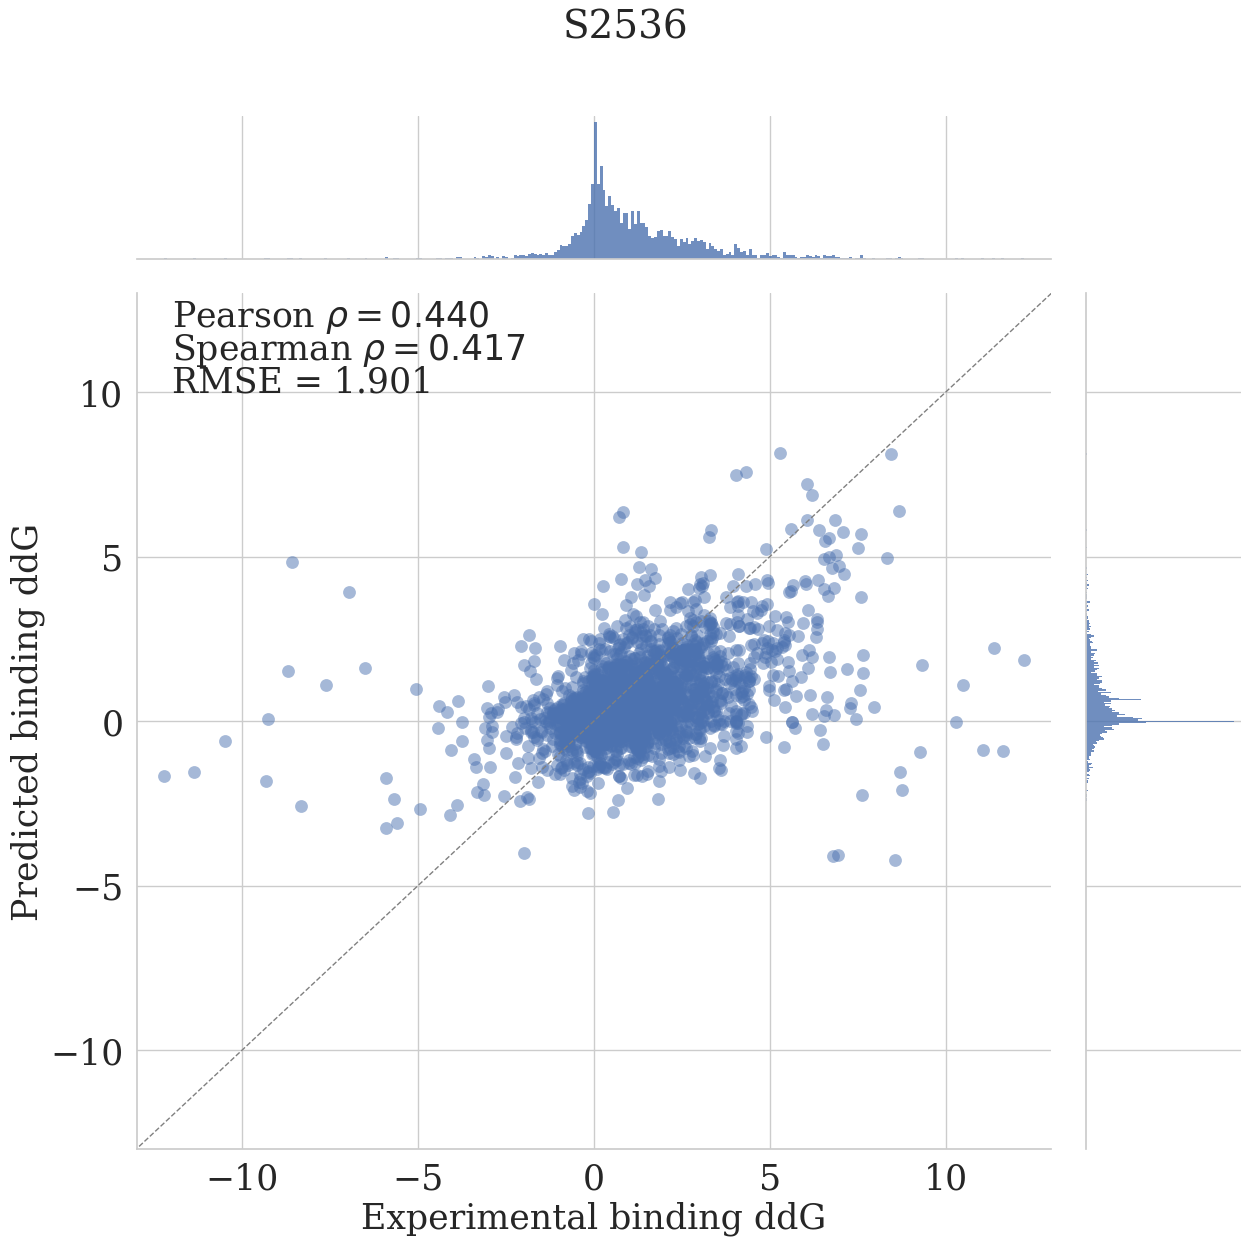

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

df = S2536_sub.dropna(subset=['mean_ddG_infc'])

# Set up the JointGrid
g = sns.JointGrid(data=df, x='DDGb', y='mean_ddG_infc',
                  height=13,  # Adjust overall figure size
                  xlim=(-13, 13), ylim=(-13, 13))

#g = g.plot(sns.scatterplot, sns.kdeplot, alpha=0.5, linewidth=0, size=65)
g.plot_joint(sns.scatterplot, alpha=0.5, linewidth=0, s=85)
# g.plot_marginals(sns.kdeplot, fill=True, alpha=0.6, linewidth=0)
g.plot_marginals(sns.histplot, fill=True, alpha=0.8, linewidth=0, bins=300)

# Add labels and title
g.set_axis_labels(xlabel='Experimental binding ddG', ylabel='Predicted binding ddG', fontsize=25)
g.fig.suptitle('S2536', fontsize=28, y=1) # Adjust suptitle position


# Add the diagonal line
min_val = -15 - 1.5
max_val = 15 + 1.5
g.ax_joint.plot([min_val, max_val], [min_val, max_val], color='gray', ls='--', lw=1)

# Calculate and annotate Pearson correlation coefficients
r_p, p_p = stats.pearsonr(df['DDGb'], df['mean_ddG_infc'])
g.ax_joint.annotate(f"Pearson $\\rho = {r_p:.3f}$", xy=(-12, 12), fontsize = 25)

r_s, p_s = stats.spearmanr(df['DDGb'], df['mean_ddG_infc'])
g.ax_joint.annotate(f'Spearman $\\rho = {r_s:.3f}$', xy=(-12, 11), fontsize = 25)

rmse = sqrt(mean_squared_error(df['DDGb'], df['mean_ddG_infc']))
g.ax_joint.annotate(f'RMSE = {rmse:.3f}', xy=(-12, 10), fontsize = 25)

# # Add a legend to distinguish hue subgroups
# g.ax_joint.legend(title='Number of Mutations', fontsize=15, title_fontsize=18)

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0.03, 1, 1]) # Adjust rect to prevent suptitle overlap
plt.savefig('Figures/S2536.pdf', format='pdf')

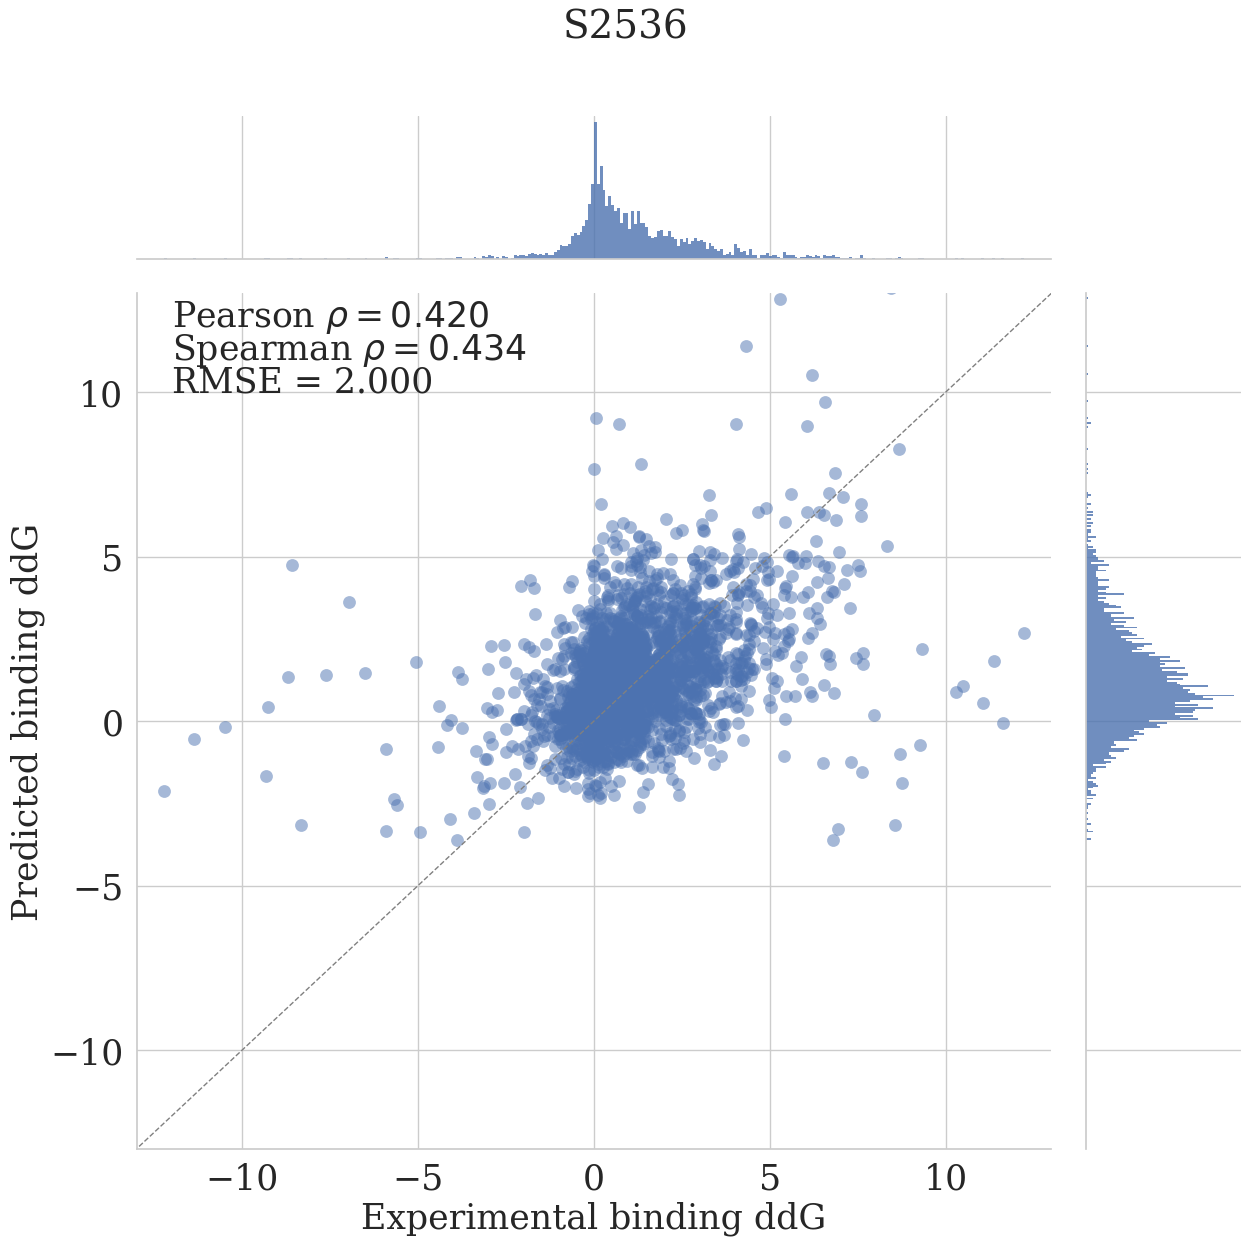

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

df = S2536_sub.dropna(subset=['mean_ddG'])

# Set up the JointGrid
g = sns.JointGrid(data=df, x='DDGb', y='mean_ddG',
                  height=13,  # Adjust overall figure size
                  xlim=(-13, 13), ylim=(-13, 13))

#g = g.plot(sns.scatterplot, sns.kdeplot, alpha=0.5, linewidth=0, size=65)
g.plot_joint(sns.scatterplot, alpha=0.5, linewidth=0, s=85)
# g.plot_marginals(sns.kdeplot, fill=True, alpha=0.6, linewidth=0)
g.plot_marginals(sns.histplot, fill=True, alpha=0.8, linewidth=0, bins=300)

# Add labels and title
g.set_axis_labels(xlabel='Experimental binding ddG', ylabel='Predicted binding ddG', fontsize=25)
g.fig.suptitle('S2536', fontsize=28, y=1) # Adjust suptitle position


# Add the diagonal line
min_val = -15 - 1.5
max_val = 15 + 1.5
g.ax_joint.plot([min_val, max_val], [min_val, max_val], color='gray', ls='--', lw=1)

# Calculate and annotate Pearson correlation coefficients
r_p, p_p = stats.pearsonr(df['DDGb'], df['mean_ddG'])
g.ax_joint.annotate(f"Pearson $\\rho = {r_p:.3f}$", xy=(-12, 12), fontsize = 25)

r_s, p_s = stats.spearmanr(df['DDGb'], df['mean_ddG'])
g.ax_joint.annotate(f'Spearman $\\rho = {r_s:.3f}$', xy=(-12, 11), fontsize = 25)

rmse = sqrt(mean_squared_error(df['DDGb'], df['mean_ddG']))
g.ax_joint.annotate(f'RMSE = {rmse:.3f}', xy=(-12, 10), fontsize = 25)

# # Add a legend to distinguish hue subgroups
# g.ax_joint.legend(title='Number of Mutations', fontsize=15, title_fontsize=18)

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0.03, 1, 1]) # Adjust rect to prevent suptitle overlap
#plt.savefig('Figures/S2536.pdf', format='pdf')

In [ ]:
residue_asa_3 = {
    'GLY': 47.155,
    'ALA': 61.063,
    'SER': 69.073,
    'CYS': 78.62,
    'PRO': 81.03,
    'THR': 82.92,
    'ASP': 86.142,
    'VAL': 90.264,
    'ASN': 90.541,
    'GLU': 102.57,
    'ILE': 105.307,
    'LEU': 105.842,
    'GLN': 106.534,
    'HIS': 110.864,
    'MET': 112.01,
    'LYS': 120.502,
    'PHE': 124.714,
    'TYR': 130.885,
    'ARG': 138.595,
    'TRP': 148.915
}

residue_asa_1 = {
    'G': 47.155,
    'A': 61.063,
    'S': 69.073,
    'C': 78.62,
    'P': 81.03,
    'T': 82.92,
    'D': 86.142,
    'V': 90.264,
    'N': 90.541,
    'E': 102.57,
    'I': 105.307,
    'L': 105.842,
    'Q': 106.534,
    'H': 110.864,
    'M': 112.01,
    'K': 120.502,
    'F': 124.714,
    'Y': 130.885,
    'R': 138.595,
    'W': 148.915
}